In [1]:
#importing the data set
churn = read.csv("Telco-Customer-Churn.csv")

In [2]:
#checking the head of the data set
head(churn)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [3]:
# checking the str of the data set
str(churn)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

# dealing with the missing values

In [4]:
names(churn)

[1] "customerID"       "gender"           "SeniorCitizen"    "Partner"         
 [5] "Dependents"       "tenure"           "PhoneService"     "MultipleLines"   
 [9] "InternetService"  "OnlineSecurity"   "OnlineBackup"     "DeviceProtection"
[13] "TechSupport"      "StreamingTV"      "StreamingMovies"  "Contract"        
[17] "PaperlessBilling" "PaymentMethod"    "MonthlyCharges"   "TotalCharges"    
[21] "Churn"

In [5]:
library(dplyr)
glimpse(churn)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Observations: 7,043
Variables: 21
$ customerID       <fct> 7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 92...
$ gender           <fct> Female, Male, Male, Male, Female, Female, Male, Fe...
$ SeniorCitizen    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ Partner          <fct> Yes, No, No, No, No, No, No, No, Yes, No, Yes, No,...
$ Dependents       <fct> No, No, No, No, No, No, Yes, No, No, Yes, Yes, No,...
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49...
$ PhoneService     <fct> No, Yes, Yes, No, Yes, Yes, Yes, No, Yes, Yes, Yes...
$ MultipleLines    <fct> No phone service, No, No, No phone service, No, Ye...
$ InternetService  <fct> DSL, DSL, DSL, DSL, Fiber optic, Fiber optic, Fibe...
$ OnlineSecurity   <fct> No, Yes, Yes, Yes, No, No, No, Yes, No, Yes, Yes, ...
$ OnlineBackup     <fct> Yes, No, Yes, No, No, No, Yes, No, No, Yes, No, No...
$ DeviceProtection <fct> No, Yes, No, Yes, No, Yes, No, No, Yes, No, No, No...
$ TechSupport     

In [6]:
sapply(churn, function(x) sum(is.na(x)))

customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0               11 
           Churn 
               0

Warning message:
"package 'Amelia' was built under R version 3.5.2"Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2018 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


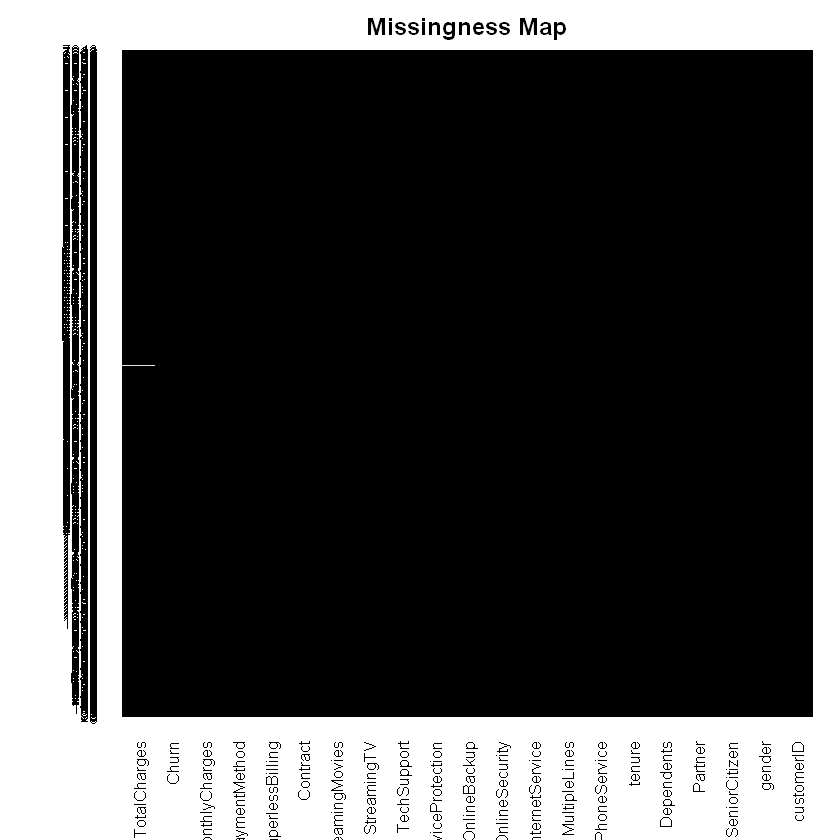

In [7]:
library(Amelia)
missmap(obj = churn, legend = FALSE, col = c("yellow", 'black'))

#### We found that there are 11 missing values in “TotalCharges” columns. So, let’s remove all rows with missing values.

In [8]:
churn = churn[complete.cases(churn),]

In [9]:
#let's recheck the missing values
sapply(churn, function(x) sum(is.na(x)))

customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0                0 
           Churn 
               0

#####  data contains various categorical features that are character types, such as the "Dependents" feature, that has values of either "Yes" or "No".  There's also numeric types, which includes "MonthlyCharges" and "TotalCharges".  The "SeniorCitizen" variable is an integer type, but it really represents "Yes" and "No" so we'll convert that to a factor. 

In [10]:
# let's take a copy of our data set
churn_df = data.frame(churn)

In [11]:
library(dplyr)
churn_df = churn_df %>% mutate_if(is.character, as.factor)
churn_df$SeniorCitizen = as.factor(churn_df$SeniorCitizen)

In [12]:
glimpse(churn_df)

Observations: 7,032
Variables: 21
$ customerID       <fct> 7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOCW, 92...
$ gender           <fct> Female, Male, Male, Male, Female, Female, Male, Fe...
$ SeniorCitizen    <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ Partner          <fct> Yes, No, No, No, No, No, No, No, Yes, No, Yes, No,...
$ Dependents       <fct> No, No, No, No, No, No, Yes, No, No, Yes, Yes, No,...
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49...
$ PhoneService     <fct> No, Yes, Yes, No, Yes, Yes, Yes, No, Yes, Yes, Yes...
$ MultipleLines    <fct> No phone service, No, No, No phone service, No, Ye...
$ InternetService  <fct> DSL, DSL, DSL, DSL, Fiber optic, Fiber optic, Fibe...
$ OnlineSecurity   <fct> No, Yes, Yes, Yes, No, No, No, Yes, No, Yes, Yes, ...
$ OnlineBackup     <fct> Yes, No, Yes, No, No, No, Yes, No, No, Yes, No, No...
$ DeviceProtection <fct> No, Yes, No, Yes, No, Yes, No, No, Yes, No, No, No...
$ TechSupport     

In [13]:
#tb = churn_df %>% select_if(is.factor) %>% summarise_all(n_distinct)

### Data Visualization
### let's find the answer for the following questions

-  Are men more likely to churn than women?  
-  Are senior citizens more like to churn?
-  Do individuals with a partner churn more than those without a partner?
-  Do people with dependents churn more than people that do not have dependents?

Warning message:
"Ignoring unknown aesthetics: position"

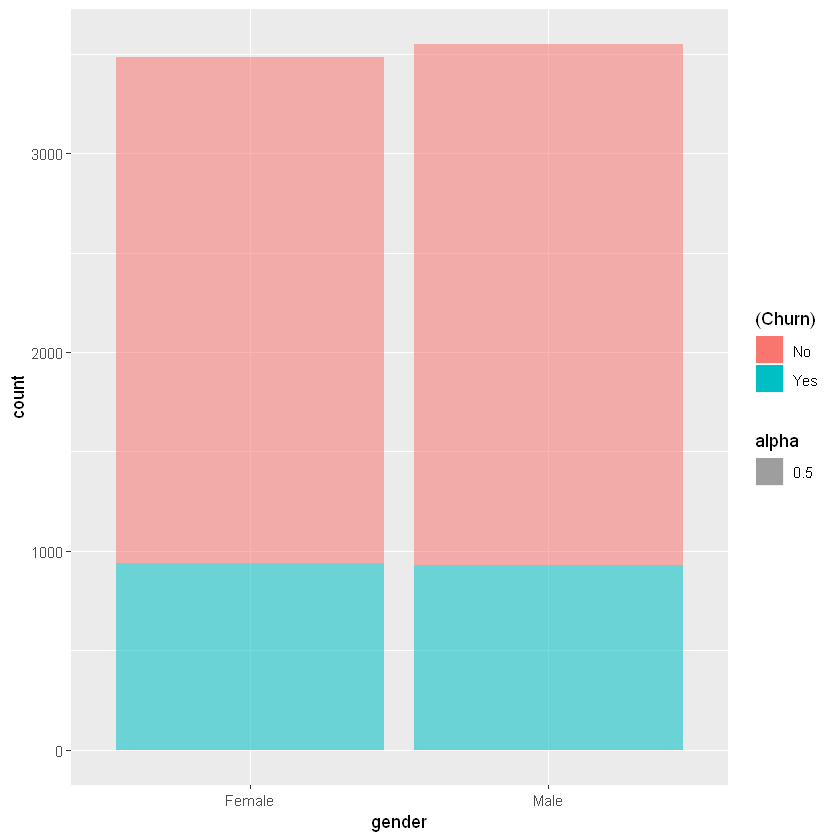

In [14]:
#Statring from gender tendacy to churn
library(ggplot2)
ggplot(data = churn_df, aes(x = gender)) +
geom_bar(aes(fill = (Churn), alpha = 0.5,  position = "dodge"))

Taking a look, the results are similar.  Roughly one quarter of the male customers churn, and roughly one quarter of the female customers churn.  We can also take a look at exactly how many people from each gender churned.

In [15]:
churn_df %>% 
  group_by(gender,Churn) %>% 
  summarise(n=n())

gender,Churn,n
Female,No,2544
Female,Yes,939
Male,No,2619
Male,Yes,930


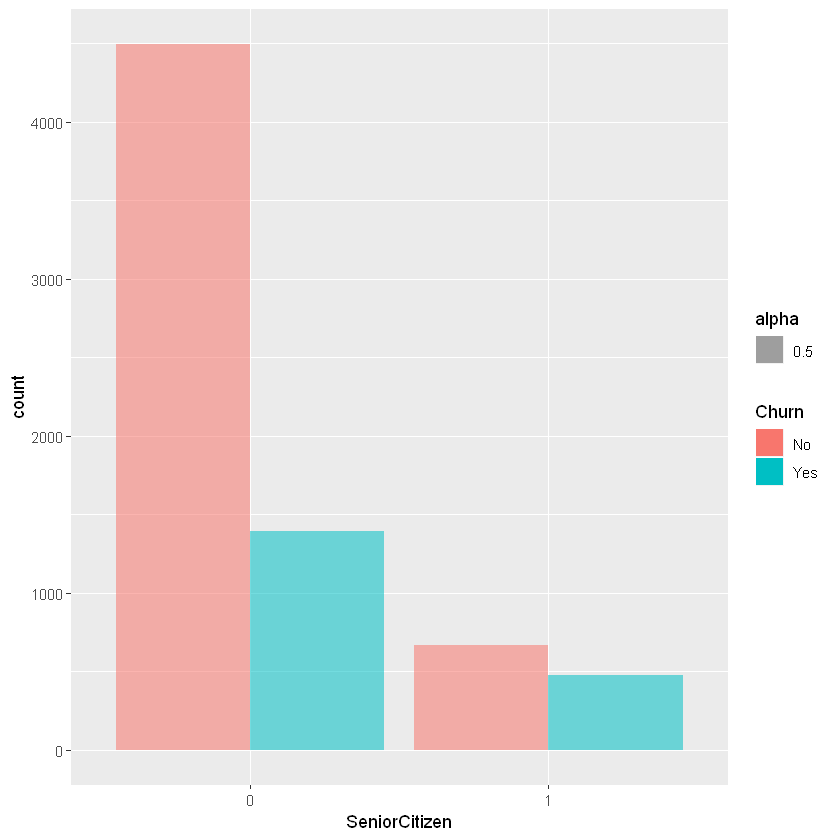

In [16]:
#Senior Citizens
ggplot(data  = churn_df, aes(x = SeniorCitizen)) +
geom_bar(aes(fill = Churn, alpha = 0.5), position = "dodge")

In [17]:
#churn_df %>% group_by(SeniorCitizen, Churn) %>% summarise(n = n(), average = mean(TotalCharges), maximum = max(TotalCharges))
churn_df %>% group_by(SeniorCitizen, Churn) %>% summarise(n = n())

SeniorCitizen,Churn,n
0,No,4497
0,Yes,1393
1,No,666
1,Yes,476


In [18]:
churn_df %>% group_by(SeniorCitizen, Churn) %>% summarise(n = n()) %>% mutate(Percentage = n / sum(n))

SeniorCitizen,Churn,n,Percentage
0,No,4497,0.7634975
0,Yes,1393,0.2365025
1,No,666,0.5831874
1,Yes,476,0.4168126


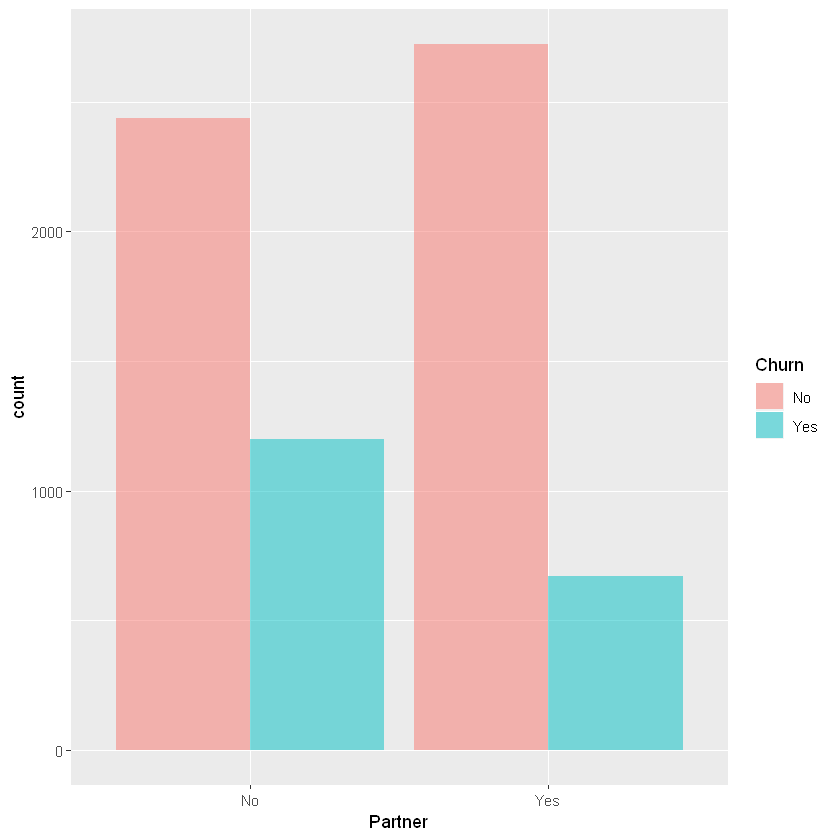

In [19]:
#Partener
ggplot(data = churn_df, aes(x = Partner)) +
geom_bar(aes(fill = Churn), alpha = 0.5, position = "dodge")

In [20]:
churn_df %>% group_by(Partner, Churn) %>% summarise(n = n())

Partner,Churn,n
No,No,2439
No,Yes,1200
Yes,No,2724
Yes,Yes,669


In [21]:
churn_df %>% group_by(Partner, Churn) %>% summarise(n = n()) %>% mutate(percent = n/sum(n))

Partner,Churn,n,percent
No,No,2439,0.6702391
No,Yes,1200,0.3297609
Yes,No,2724,0.8028294
Yes,Yes,669,0.1971706


Roughly half of the people have partners.  Of the people with partners, 20% churn.  For people without partners, approximately 33% churn.

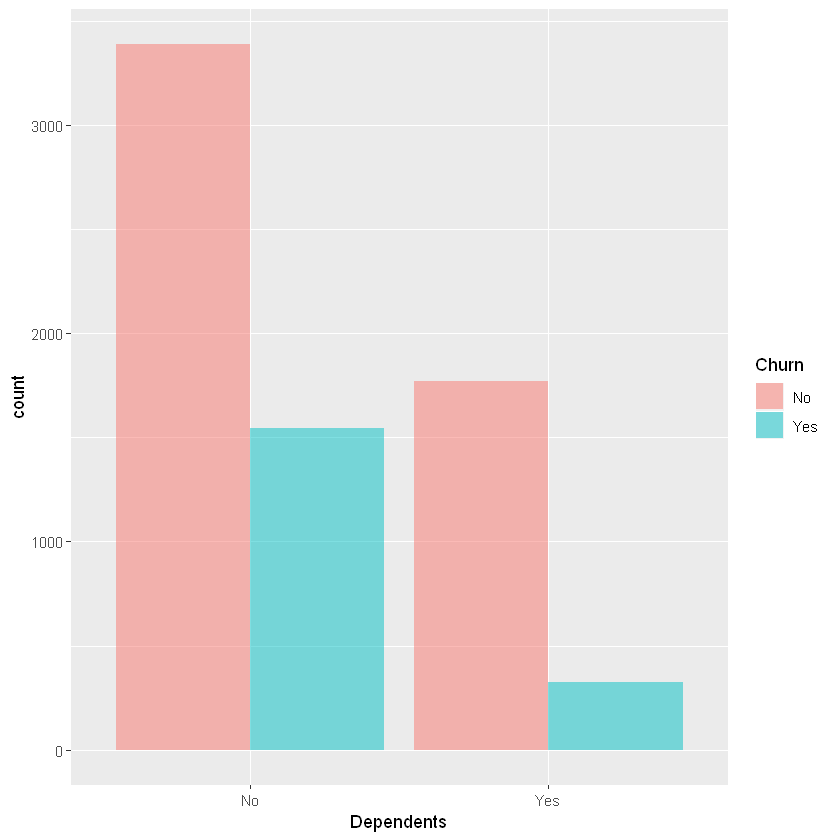

In [22]:
# dependent
ggplot(data = churn_df, aes(x = Dependents)) +
geom_bar(aes(fill = Churn), alpha = 0.5, position = "dodge")

In [23]:
churn_df %>% group_by(Dependents, Churn) %>% summarise(n = n()) %>% mutate(percent = n/sum(n))

Dependents,Churn,n,percent
No,No,3390,0.6872086
No,Yes,1543,0.3127914
Yes,No,1773,0.8446879
Yes,Yes,326,0.1553121


Approximately 30% of the people have dependents, of which 15% churn.  For the other 70% that don't have dependents, 31% churn.

### using boxplot to visualize the data and get more insight out of it

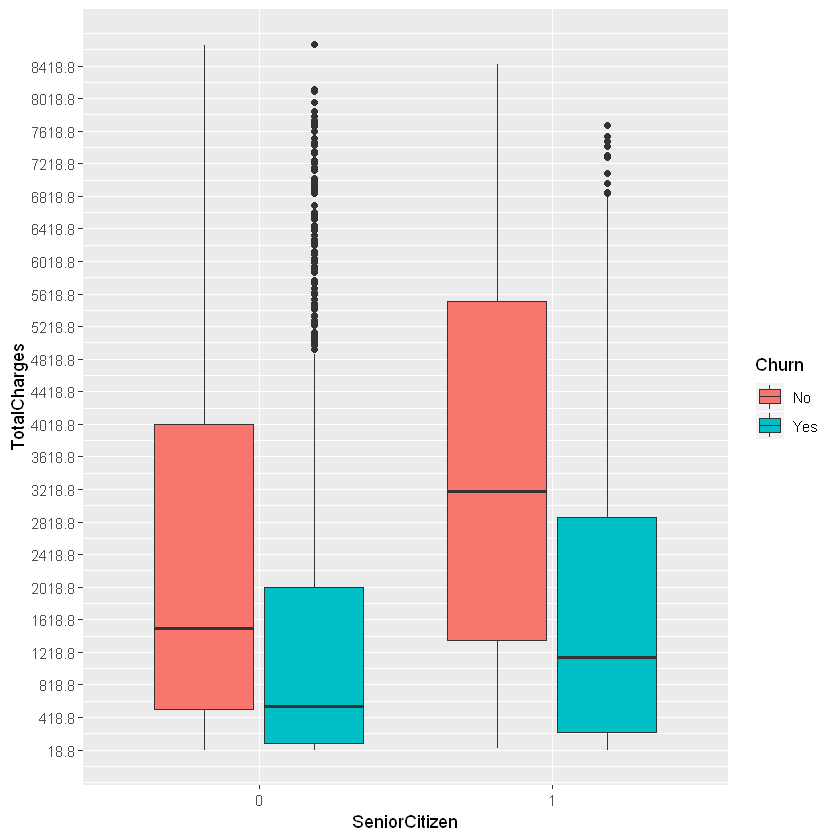

In [24]:
# Senior Citizens 
ggplot(churn_df, aes(x = SeniorCitizen, y = TotalCharges)) + 
geom_boxplot(aes(fill=Churn)) +
scale_y_continuous(breaks = seq(min(churn_df$TotalCharges), max(churn_df$TotalCharges), by = 400))

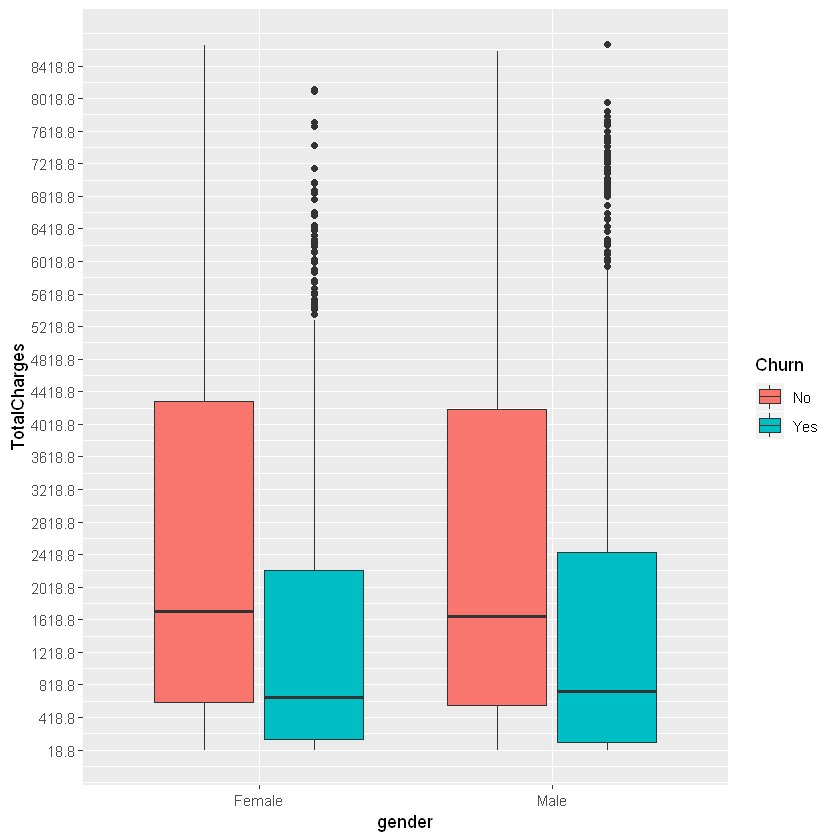

In [25]:
# Gender 
ggplot(churn_df, aes(x = gender, y = TotalCharges)) + 
geom_boxplot(aes(fill=Churn)) +
scale_y_continuous(breaks = seq(min(churn_df$TotalCharges), max(churn_df$TotalCharges), by = 400))

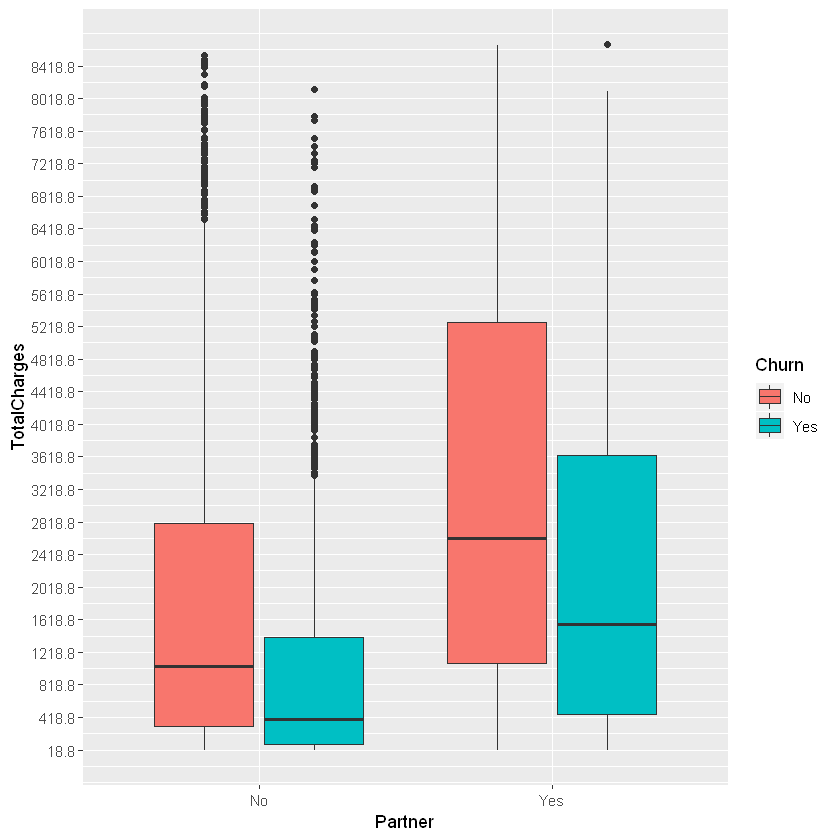

In [26]:
# Partner 
ggplot(churn_df, aes(x = Partner, y = TotalCharges)) + 
geom_boxplot(aes(fill=Churn)) +
scale_y_continuous(breaks = seq(min(churn_df$TotalCharges), max(churn_df$TotalCharges), by = 400))

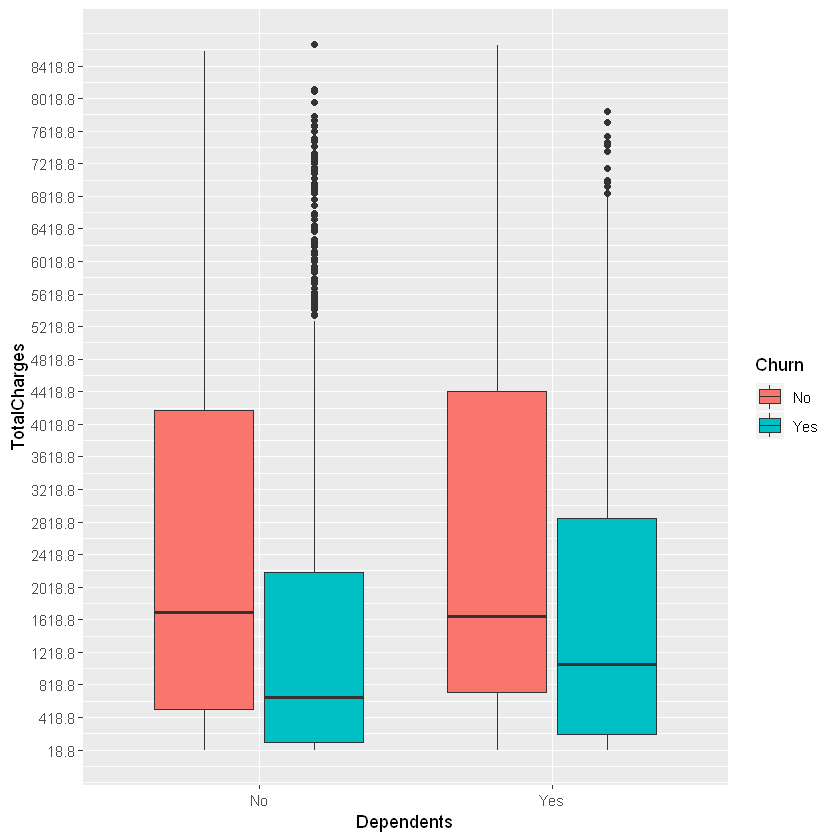

In [27]:
# Dependents
ggplot(churn_df, aes(x = Dependents, y = TotalCharges)) + 
geom_boxplot(aes(fill=Churn)) +
scale_y_continuous(breaks = seq(min(churn_df$TotalCharges), max(churn_df$TotalCharges), by = 400))

In [28]:
# Total charges and tenure of people without a partner
churn_df %>% 
  select(Partner, Churn, TotalCharges, tenure) %>% 
  filter(Partner == "No", Churn == "Yes") %>% 
  summarise(n = n(),
            total = sum(TotalCharges),
            avg_tenure = sum(tenure)/n)

n,total,avg_tenure
1200,1306776,13.17667


## Model building using Logistic Regression

In [29]:
head(churn_df)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [30]:
# removing customerID
churn_df = select(churn_df, -customerID)

In [31]:
head(churn_df)

gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


## Spliting the dataset into training and testing set

In [32]:
library(caret)
set.seed(1234)
inTrain = createDataPartition(y = churn_df$Churn, list = FALSE, p = 0.75)

Warning message:
"package 'caret' was built under R version 3.5.2"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.5.2"

In [33]:
train = churn_df[inTrain,]
test = churn_df[-inTrain,]

In [34]:
dim(train)

[1] 5275   20

In [35]:
dim(test)

[1] 1757   20

In [36]:
# using all the features to create the model at first
classifier = glm(formula =train$Churn ~., family = binomial(link = "logit"), data = train)

In [37]:
summary(classifier)


Call:
glm(formula = train$Churn ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9211  -0.6883  -0.2821   0.7234   3.3819  

Coefficients: (7 not defined because of singularities)
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           1.884e+00  9.454e-01   1.993 0.046247 *  
genderMale                            1.496e-02  7.510e-02   0.199 0.842090    
SeniorCitizen1                        1.388e-01  9.856e-02   1.408 0.159052    
PartnerYes                           -5.406e-02  8.936e-02  -0.605 0.545167    
DependentsYes                        -1.779e-01  1.032e-01  -1.723 0.084841 .  
tenure                               -5.937e-02  7.044e-03  -8.428  < 2e-16 ***
PhoneServiceYes                       7.832e-01  7.501e-01   1.044 0.296402    
MultipleLinesNo phone service                NA         NA      NA       NA    
MultipleLinesYes  

In [38]:
#making prediction
y_pred = predict(object = classifier, newdata = test, type = "response")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

In [39]:
head(y_pred)

1          3         12         27         29         31 
0.62605410 0.32121244 0.03055576 0.51504800 0.01420525 0.02279425

In [40]:
y_pred = ifelse(y_pred > 0.5, "Yes", "No")

In [41]:
y_pred = as.factor(y_pred)

In [42]:
head(y_pred)

1   3  12  27  29  31 
Yes  No  No Yes  No  No 
Levels: No Yes

In [43]:
confusionMatrix(y_pred, test$Churn, positive = "Yes")

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1140  204
       Yes  150  263
                                        
               Accuracy : 0.7985        
                 95% CI : (0.779, 0.817)
    No Information Rate : 0.7342        
    P-Value [Acc > NIR] : 2.05e-10      
                                        
                  Kappa : 0.464         
 Mcnemar's Test P-Value : 0.004849      
                                        
            Sensitivity : 0.5632        
            Specificity : 0.8837        
         Pos Pred Value : 0.6368        
         Neg Pred Value : 0.8482        
             Prevalence : 0.2658        
         Detection Rate : 0.1497        
   Detection Prevalence : 0.2351        
      Balanced Accuracy : 0.7234        
                                        
       'Positive' Class : Yes           
                                        

In [44]:
library(pscl)
pR2(classifier)

Warning message:
"package 'pscl' was built under R version 3.5.2"Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis


llh       llhNull            G2      McFadden          r2ML 
-2181.2347177 -3054.3211617  1746.1728880     0.2858529     0.2818150 
         r2CU 
    0.4108703

In [45]:
library(caret)
varImp(classifier)

,Overall
genderMale,0.19922047
SeniorCitizen1,1.40826707
PartnerYes,0.60501880
DependentsYes,1.72326130
tenure,8.42754857
PhoneServiceYes,1.04418041
MultipleLinesYes,2.75233216
InternetServiceFiber optic,2.60695752
InternetServiceNo,2.63036916
OnlineSecurityYes,0.06706515


### based on the fucntion varImp, the features like 'TotalCharges', 'PaymentMethodElectronic check','ContractTwo year','ContractOne year', 'ContractTwo year' are the most significant

In [56]:
#train_df = data.frame(train)
#train_df %>% mutate_if(is.factor, as.numeric)
#head(train_df)

In [ ]:
#vifstep(train[-20], th = 10)

In [ ]:
#library(MASS)
#step=stepAIC(classifier, direction="both")

In [ ]:
#cor(train)

In [ ]:
#library(ggcorrplot)
#ggcorrplot(cor(copy), lab = TRUE)

In [57]:
# fitting the model
classifier2 <- glm(Churn~SeniorCitizen + tenure + MultipleLines + InternetService + StreamingTV + Contract + PaperlessBilling + PaymentMethod + TotalCharges
           , data=train, 
           family=binomial(link = "logit"))

In [58]:
summary(classifier2)


Call:
glm(formula = Churn ~ SeniorCitizen + tenure + MultipleLines + 
    InternetService + StreamingTV + Contract + PaperlessBilling + 
    PaymentMethod + TotalCharges, family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8378  -0.6903  -0.3017   0.7696   3.4675  

Coefficients: (1 not defined because of singularities)
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          -0.7691594  0.1415082  -5.435 5.47e-08 ***
SeniorCitizen1                        0.2137603  0.0959659   2.227 0.025917 *  
tenure                               -0.0575211  0.0067723  -8.494  < 2e-16 ***
MultipleLinesNo phone service         0.6461830  0.1477283   4.374 1.22e-05 ***
MultipleLinesYes                      0.2569313  0.0911434   2.819 0.004818 ** 
InternetServiceFiber optic            0.8820594  0.1095278   8.053 8.06e-16 ***
InternetServiceNo                    -0.4484

In [74]:
# making the prediction
y_pred2 = predict(classifier2, newdata=test, type = "response")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

In [75]:
head(y_pred2)

1          3         12         27         29         31 
0.63341247 0.35094297 0.02173459 0.48541776 0.01625035 0.04292267

In [76]:
y_pred2 = ifelse(y_pred2 > 0.5,"Yes","No")

In [77]:
y_pred2 = as.factor(y_pred2)

In [78]:
head(y_pred2)

1   3  12  27  29  31 
Yes  No  No  No  No  No 
Levels: No Yes

In [79]:
confusionMatrix(y_pred2, test$Churn, positive = "Yes")

Confusion Matrix and Statistics

          Reference
Prediction   No  Yes
       No  1150  203
       Yes  140  264
                                          
               Accuracy : 0.8048          
                 95% CI : (0.7855, 0.8231)
    No Information Rate : 0.7342          
    P-Value [Acc > NIR] : 2.906e-12       
                                          
                  Kappa : 0.4773          
 Mcnemar's Test P-Value : 0.0008149       
                                          
            Sensitivity : 0.5653          
            Specificity : 0.8915          
         Pos Pred Value : 0.6535          
         Neg Pred Value : 0.8500          
             Prevalence : 0.2658          
         Detection Rate : 0.1503          
   Detection Prevalence : 0.2299          
      Balanced Accuracy : 0.7284          
                                          
       'Positive' Class : Yes             
                                          